### Flatten np arrays and plot PCA(2)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sys.path.append('../src')
from datagen import DataGenerator

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DATA = Path('../data')

In [83]:
datagen = DataGenerator(DATA/'training', 
                        include=['Rock', 'Hip-Hop'], 
                        batch_size=1000)

In [84]:
datagen.label_dict

{'Hip-Hop': 0, 'Rock': 1}

In [85]:
X, y = datagen.__getitem__(0)
y = np.argmax(y, axis=1)

In [86]:
X.shape

(1000, 128, 640, 1)

In [92]:
X[:,:,1].shape

(1000, 128, 1)

In [63]:
y.shape

(1000,)

In [64]:
X_flat = X.reshape(X.shape[0], -1)
X_flat.shape

(1000, 81920)

In [65]:
# scaler = StandardScaler()
# X = scaler.fit_transform(flat)
X = X_flat
pca = PCA(2).fit(X)
Xt = pca.transform(X)

Text(0.5, 1.0, 'PCA of Genres')

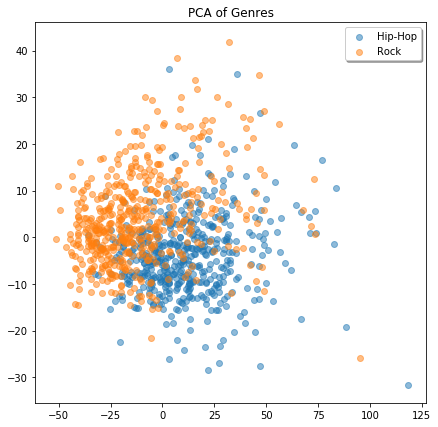

In [72]:
fig, ax = plt.subplots(figsize=(7,7))

labels = datagen.label_dict

for k, v in labels.items():
    ax.scatter(Xt[y==v, 0], Xt[y==v, 1], alpha=.5, label=k)

ax.legend(loc='best', shadow=True)
ax.set_title('PCA of Genres')

In [11]:
def plot_pca(n=2000, labels=['Rock', 'Hip-Hop', 'Instrumental']):
    fig, ax = plt.subplots(figsize=(6,6))
    
    datagen = DataGenerator(DATA/'training', 
                        include=labels, 
                        batch_size=n)
    X, y = datagen.__getitem__(0)
    X = X.reshape(X.shape[0], -1)
    y = np.argmax(y, axis=1)
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    pca = PCA(2).fit(X)
    X = pca.transform(X)
    
    labels = datagen.label_dict

    for k, v in labels.items():
        ax.scatter(X[y==v, 0], X[y==v, 1], alpha=.3, label=k)

    ax.legend(loc='best', shadow=True)
    ax.set_title('PCA of Genres')
    return ax

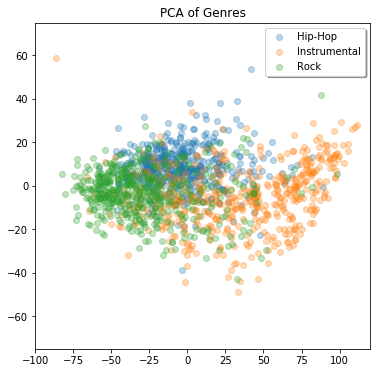

In [12]:
ax = plot_pca(n=1500, labels=['Rock', 'Hip-Hop', 'Instrumental'])
ax.set_ylim(-75,75)
ax.set_xlim(-100,120)
plt.savefig('../images/PCA_rock_hiphop_inst.png', dpi=200)

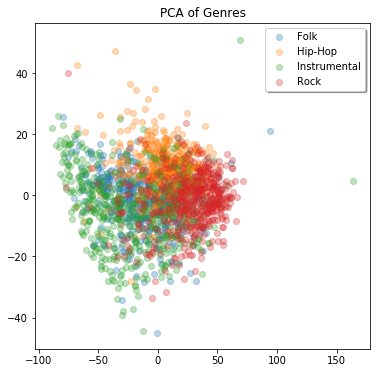

In [81]:
plot_pca(labels=['Rock','Hip-Hop', 'Folk', 'Instrumental'])